<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
<li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li>

<li><span><a href="#Eliminate-null" data-toc-modified-id="Eliminate-null-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eliminate null</a></span></li>

<li><span><a href="#Normalization" data-toc-modified-id="Normalization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Normalization</a></span></li>

<li><span><a href="#Visualization" data-toc-modified-id="Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualization</a></span></li>

<li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Linear Regression</a></span></li>

<li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Decision Tree</a></span></li>

<li><span><a href="#KNN" data-toc-modified-id="KNN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>KNN</a></span></li></ul></div>

# Description

#### The urine data frame has 79 rows and 7 columns. 79 urine specimens were analyzed in an effort to determine if certain physical characteristics of the urine might be related to the formation of calcium oxalate crystals.

* This data frame contains the following columns: r, gravity, ph,osmo, cond,urea and calc
    * r: 腎結石有無出現 | Indicator of the presence of calcium oxalate crystals.
    * gravity: 尿液比重 |The specific gravity of the urine.
    * ph: The pH reading of the urine.
    * osmo: 滲透壓 | The osmolarity of the urine. Osmolarity is proportional to the concentration of molecules in solution. $#No.54 has no osmo value$
    * cond: The conductivity of the urine. Conductivity is proportional to the concentration of charged ions in solution. $#No.0 has no cond value$
    * urea: 血清脲濃度 | The urea concentration in millimoles per litre.
    * calc: 鈣濃度 | The calcium concentration in millimoles per litre.

**Source**<br>
The data were obtained from Andrews, D.F. and Herzberg, A.M. (1985) Data: A Collection of Problems from Many Fields for the Student and Research Worker. Springer-Verlag.<br>

**References**<br>
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.<br>

In [1]:
#Import packages
import numpy as np
import pandas as pd
import IPython as ip
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
ip.display.set_matplotlib_formats('svg')
from pandas.tools.plotting import table

In [2]:
#Reading data
df = pd.read_csv("urine.csv")

In [3]:
# Check NaN in urine testing data
df.describe()

C:\Users\名\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Unnamed: 0,r,gravity,ph,osmo,cond,urea,calc
count,79.000000,79.000000,79.000000,79.000000,78.000000,78.000000,79.000000,79.000000
mean,40.000000,0.430380,1.018114,6.028481,615.038462,20.901282,266.405063,4.138987
std,22.949219,0.498293,0.007239,0.724307,238.247685,7.952072,131.254550,3.260051
min,1.000000,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000
25%,20.500000,0.000000,1.012000,5.530000,NaN,NaN,160.000000,1.460000
50%,40.000000,0.000000,1.018000,5.940000,NaN,NaN,260.000000,3.160000
75%,59.500000,1.000000,1.023500,6.385000,NaN,NaN,372.000000,5.930000
max,79.000000,1.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000


# Eliminate null

<div class="toc"><ul class="toc-item">
<li><span><a href="#Mathod1:-fill-null-with-0" data-toc-modified-id="Mathod1:-fill-null-with-0-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mathod1: fill null with 0</a></span></li>

<li><span><a href="#Mathod2:-fill-the-null-with-the-average-of-the-feature" data-toc-modified-id="Mathod2:-fill-the-null-with-the-average-of-the-feature-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mathod2: fill the null with the average of the feature</a></span></li>

<li><span><a href="#Mathod3:-directly-drop-the-null" data-toc-modified-id="Mathod3:-directly-drop-the-null-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mathod3: directly drop the null</a></span></li></ul></div>

### Mathod1: fill null with 0

In [4]:
df1 = df.iloc[:,1:]

In [5]:
df1.fillna(0,inplace=True)

In [6]:
df1.describe()

,r,gravity,ph,osmo,cond,urea,calc
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.430380,1.018114,6.028481,607.253165,20.636709,266.405063,4.138987
std,0.498293,0.007239,0.724307,246.622179,8.243462,131.254550,3.260051
min,0.000000,1.005000,4.760000,0.000000,0.000000,10.000000,0.170000
25%,0.000000,1.012000,5.530000,409.000000,13.850000,160.000000,1.460000
50%,0.000000,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000
75%,1.000000,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000
max,1.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000


In [7]:
df1.describe().to_csv("description_after0.csv")

### Mathod2: fill the null with the average of the feature

In [8]:
df2 = df.iloc[:,1:]

In [9]:
df2.iloc[54,3] = df2.iloc[:,3].mean()
df2.iloc[0,4] = df2.iloc[:,4].mean()

In [10]:
df2.describe()

,r,gravity,ph,osmo,cond,urea,calc
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.430380,1.018114,6.028481,615.038462,20.901282,266.405063,4.138987
std,0.498293,0.007239,0.724307,236.715530,7.900933,131.254550,3.260051
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000
25%,0.000000,1.012000,5.530000,413.000000,14.450000,160.000000,1.460000
50%,0.000000,1.018000,5.940000,615.038462,21.400000,260.000000,3.160000
75%,1.000000,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000
max,1.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000


In [11]:
df2.describe().to_csv("description_nulltoaverage.csv")

### Mathod3: directly drop the null

In [12]:
#remove the extra index
df3 = df.iloc[:,1:]

In [13]:
#Mathod3: directly drop the null
df3.dropna(inplace=True)

In [14]:
df3.describe()

,r,gravity,ph,osmo,cond,urea,calc
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.428571,1.018026,6.040649,613.610390,20.905195,262.402597,4.160390
std,0.498117,0.007313,0.722068,239.473719,8.004142,130.486363,3.296907
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000
25%,0.000000,1.012000,5.530000,410.000000,14.300000,159.000000,1.450000
50%,0.000000,1.018000,5.940000,594.000000,21.400000,255.000000,3.160000
75%,1.000000,1.024000,6.400000,803.000000,27.000000,362.000000,6.190000
max,1.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000


# Normalization

In [15]:
#features
X2 = df3.iloc[:, 1:]
#answer
Y2 = df3.iloc[:, 0]

In [16]:
X3 = (X2 - X2.mean()) / (X2.max() - X2.min())

In [17]:
X3.describe().to_csv("description_X3nornalized.csv")

# Visualization

* Interaction of all features
    * Correlation of calcium oxalate crystals with distribution of other features
    * Correlation of Gravity with distribution of other features
* Two features scatter
    * Gravity and Urea scatter
    * Urea and Calcium scatter
    * Osmo and calc scatter
    * Urea and pH scatter

In [18]:
data = X3.values

In [19]:
gravity = data[:,0]
ph = data[:,1]
osmo = data[:,2]
cond = data[:,3]
urea = data[:,4]
calc = data[:,5]

In [20]:
#binary, answer
Y = Y2

In [21]:
#index 
dis = range(len(gravity))

In [22]:
import os

In [23]:
os.getcwd()

'C:\\users\\名\\LLW\\NCCU_Algorithms'

In [27]:
image_path = os.getcwd() + "\image"

In [28]:
image_path

'C:\\users\\名\\LLW\\NCCU_Algorithms\\image'

### Correlation of calcium oxalate crystals with distribution of each feature 

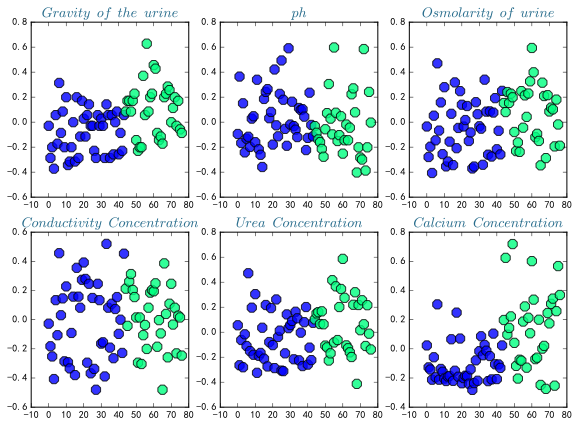

In [32]:
plt.figure(figsize=(9.6,6.9),dpi=100)

p1 = plt.subplot(231)#(2rowlength 3columnwidth index1)
p2 = plt.subplot(232)#(2rowlength 3columnwidth index2)
p3 = plt.subplot(233)#(2rowlength 3columnwidth index3)
p4 = plt.subplot(234)#(2rowlength 3columnwidth index4)
p5 = plt.subplot(235)#(2rowlength 3columnwidth index5)
p6 = plt.subplot(236)#(2rowlength 3columnwidth index6)

#數學式$式子$
title_f1 = "$Gravity$ $of$ $the$ $urine$"
title_f2 = "$ph$"
title_f3 = "$Osmolarity$ $of$ $urine$"
title_f4 = "$Conductivity$ $Concentration$"
title_f5 = "$Urea$ $Concentration$"
title_f6 = "$Calcium$ $Concentration$"

p1.scatter(dis, gravity, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p2.scatter(dis, ph, c=Y2, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p3.scatter(dis, osmo, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p4.scatter(dis, cond, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p5.scatter(dis, urea, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p6.scatter(dis, calc, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)

p1.set_title(title_f1, fontsize=14, color = "#276C8C")
p2.set_title(title_f2, fontsize=14, color = "#276C8C")
p3.set_title(title_f3, fontsize=14, color = "#276C8C")
p4.set_title(title_f4, fontsize=14, color = "#276C8C")
p5.set_title(title_f5, fontsize=14, color = "#276C8C")
p6.set_title(title_f6, fontsize=14, color = "#276C8C")

#missing value marker
#p3.text(49,0+20,"$missing$ $value$",fontsize= 15, color = "#103900", verticalalignment="bottom",horizontalalignment="left")
#p3.annotate("$missing$ $value$", fontsize= 15, color = "#103900",xy=(49, 0),xytext=(49,50),arrowprops=dict(facecolor="#F98BB0", shrink=0.001))

#p4.text(2,0+0.05,"$missing$ $value$",fontsize= 15, color = "#103900", verticalalignment="bottom",horizontalalignment="left")
#p4.annotate("$missing$ $value$",fontsize= 15, color = "#103900",xy=(0, 0),xytext=(2, 0+0.05),arrowprops=dict(facecolor="#F98BB0", shrink=0.001))

plt.savefig(image_path + '\Correlation of calcium oxalate crystals with distribution of each feature.png')
plt.savefig(image_path + '\Correlation of calcium oxalate crystals with distribution of each feature.svg')
plt.show()

### Correlation of Gravity with distribution of other features

In [33]:
x1 = gravity
x2 = urea

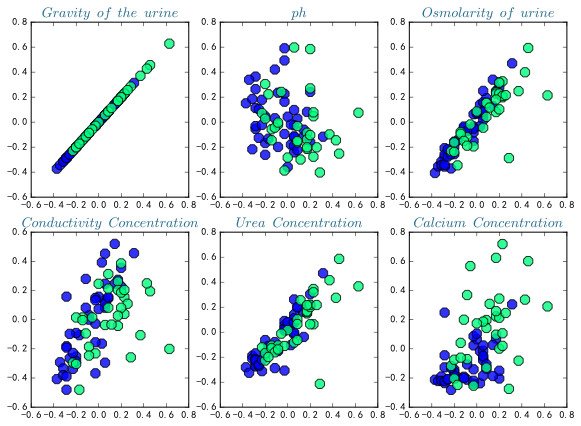

In [34]:
##test for 6 column
plt.figure(figsize=(9.6,6.9),dpi=100)

p1 = plt.subplot(231)#(2rowlength 3columnwidth index1)
p2 = plt.subplot(232)#(2rowlength 3columnwidth index2)
p3 = plt.subplot(233)#(2rowlength 3columnwidth index3)
p4 = plt.subplot(234)#(2rowlength 3columnwidth index4)
p5 = plt.subplot(235)#(2rowlength 3columnwidth index5)
p6 = plt.subplot(236)#(2rowlength 3columnwidth index6)

#數學式$式子$
title_f1 = "$Gravity$ $of$ $the$ $urine$"
title_f2 = "$ph$"
title_f3 = "$Osmolarity$ $of$ $urine$"
title_f4 = "$Conductivity$ $Concentration$"
title_f5 = "$Urea$ $Concentration$"
title_f6 = "$Calcium$ $Concentration$"

p1.scatter(x1, gravity, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p2.scatter(x1, ph, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p3.scatter(x1, osmo, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p4.scatter(x1, cond, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p5.scatter(x1, urea, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)
p6.scatter(x1, calc, c=Y, cmap=plt.cm.winter, edgecolor='k', s=100, 
            marker='8', alpha=0.8)

p1.set_title(title_f1, fontsize=14, color = "#276C8C")
p2.set_title(title_f2, fontsize=14, color = "#276C8C")
p3.set_title(title_f3, fontsize=14, color = "#276C8C")
p4.set_title(title_f4, fontsize=14, color = "#276C8C")
p5.set_title(title_f5, fontsize=14, color = "#276C8C")
p6.set_title(title_f6, fontsize=14, color = "#276C8C")

# #missing value marker
# p3.text(49,0+20,"$missing$ $value$",fontsize= 15, color = "#103900", verticalalignment="bottom",horizontalalignment="left")
# #p3.annotate("$missing$ $value$", fontsize= 15, color = "#103900",xy=(49, 0),xytext=(49,50),arrowprops=dict(facecolor="#F98BB0", shrink=0.001))

# p4.text(2,0+0.05,"$missing$ $value$",fontsize= 15, color = "#103900", verticalalignment="bottom",horizontalalignment="left")
# #p4.annotate("$missing$ $value$",fontsize= 15, color = "#103900",xy=(0, 0),xytext=(2, 0+0.05),arrowprops=dict(facecolor="#F98BB0", shrink=0.001))

plt.savefig(image_path + '\Correlation of Gravity with distribution of other features.png')
plt.savefig(image_path + '\Correlation of Gravity with distribution of other features.svg')
plt.show()

### Gravity and Urea scatter

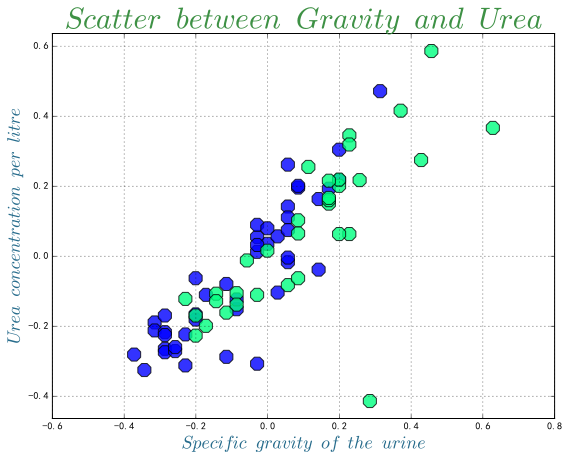

In [35]:
#single feature distribution
plt.figure(2, figsize=(9,6.9))

# Plot the training points
plt.scatter(x1, x2, c=Y, cmap=plt.cm.winter, edgecolor='k', s=200, 
            marker='8', alpha=0.8)

plt.xlabel('$Specific$ $gravity$ $of$ $the$ $urine$',fontsize=18, color = "#276C8C")
plt.ylabel('$Urea$ $concentration$ $per$ $litre$', fontsize=18, color = "#276C8C")
plt.title('$Scatter$ $between$ $Gravity$ $and$ $Urea$', fontsize = 30, color = "#3E9145")
#plt.xlim(x1.min() - 0.05, x1.max() + 0.05)
plt.ylim(x2.min() - 0.05, x2.max() + 0.05)
plt.grid(True)

plt.savefig(image_path + '\Gravity and Urea scatter.png')
plt.savefig(image_path + '\Gravity and Urea scatter.svg')
plt.show()

### Urea and Calcium scatter

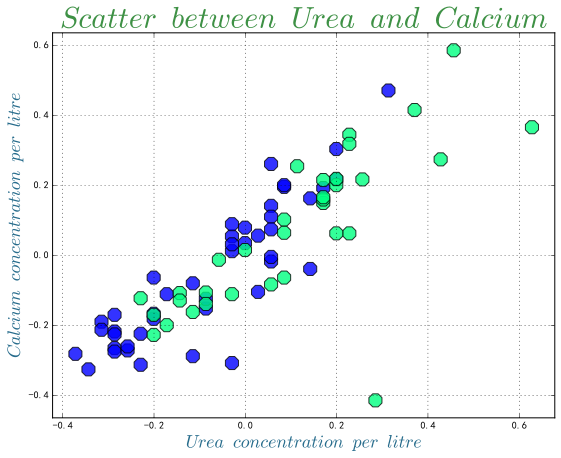

In [39]:
plt.figure(2, figsize=(9,6.9))

# Plot the training points
plt.scatter(x1, x2, c=Y, cmap=plt.cm.winter, edgecolor='k', s=200, 
            marker='8', alpha=0.8)
plt.xlabel('$Urea$ $concentration$ $per$ $litre$',fontsize=18, color = "#276C8C")
plt.ylabel('$Calcium$ $concentration$ $per$ $litre$', fontsize=18, color = "#276C8C")
plt.title('$Scatter$ $between$ $Urea$ $and$ $Calcium$', fontsize = 30, color = "#3E9145")
plt.xlim(x1.min() - 0.05, x1.max() + 0.05)
plt.ylim(x2.min() - 0.05, x2.max() + 0.05)
plt.grid(True)

plt.savefig(image_path + '\Calcium and Urea scatter.png')
plt.savefig(image_path + '\Calcium and Urea scatter.svg')
plt.show()

### Osmo and Calc scatter

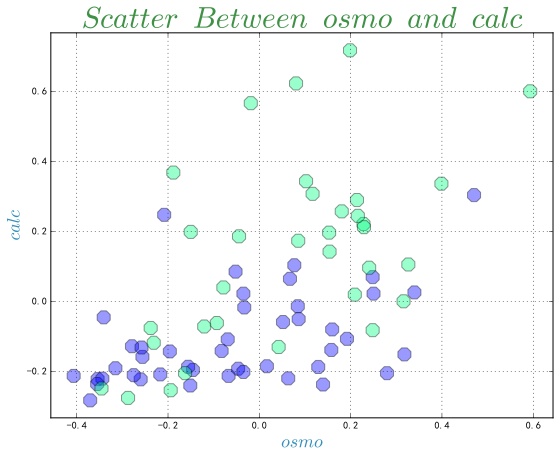

In [40]:
plt.figure(2, figsize=(9,6.9))

# Plot the training points
plt.scatter(osmo, calc, c=Y, cmap=plt.cm.winter, edgecolor='k', s=200, 
            marker='8', alpha=0.4)
plt.xlabel('$osmo$',fontsize=18, color = "#348FBA")
plt.ylabel('$calc$', fontsize=18, color = "#348FBA")
plt.title('$Scatter$ $Between$ $osmo$ $and$ $calc$', fontsize = 30, color = "#3E9145")
plt.xlim(osmo.min() - 0.05, osmo.max() + 0.05)
plt.ylim(calc.min() - 0.05, calc.max() + 0.05)
plt.grid(True)

plt.savefig(image_path + '\Osmo and Calc scatter.png')
plt.savefig(image_path + '\Osmo and Calc scatter.svg')

plt.show()

### Urea and ph scatter

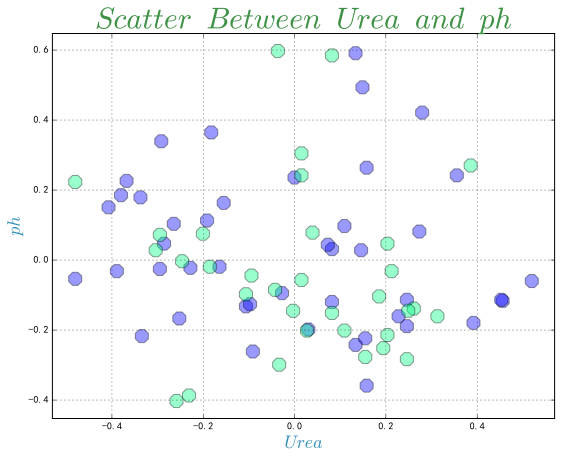

In [42]:
plt.figure(2, figsize=(9,6.9))

# Plot the training points
plt.scatter(cond, ph, c=Y, cmap=plt.cm.winter, edgecolor='k', s=200, 
            marker='8', alpha=0.4)
plt.xlabel('$Urea$',fontsize=18, color = "#348FBA")
plt.ylabel('$ph$', fontsize=18, color = "#348FBA")
plt.title('$Scatter$ $Between$ $Urea$ $and$ $ph$', fontsize = 30, color = "#3E9145")
plt.xlim(cond.min() - 0.05, cond.max() + 0.05)
plt.ylim(ph.min() - 0.05, ph.max() + 0.05)
plt.grid(True)

plt.savefig(image_path + '\pH and Urea scatter.png')
plt.savefig(image_path + '\pH and Urea scatter.svg')

plt.show()

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
lm.fit(np.reshape(gravity, (len(gravity), 1)), np.reshape(urea, (len(urea), 1)))

print(lm.coef_, lm.intercept_)

[[ 0.8469039]] [  1.69059979e-14]


In [45]:
to_be_predicted = np.array([1.0095])
predicted_urea= lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))

print(predicted_urea)

[[ 0.85494949]]


In [46]:
x1 = gravity
y1 = urea

In [47]:
X1 = np.reshape(x1, (len(x1), 1))
Y1 = np.reshape(y1, (len(y1), 1))

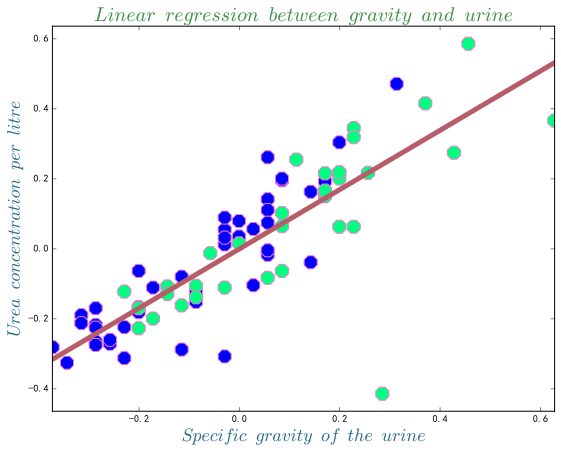

In [48]:
plt.figure(2, figsize=(9,6.9))
plt.scatter(x1, y1,c=Y, cmap=plt.cm.winter, edgecolor='#F779CF', s=200, 
            marker='8', alpha=1)
plt.plot(x1, lm.predict(np.reshape(x1, (len(x1), 1))), color='#B75D69', linewidth=5)
#plt.plot(to_be_predicted, predicted_urea, color = '#309BDD', marker = '^', markersize = 20)

#p3.text(49,0+20,"$missing$ $value$",fontsize= 15, color = "#103900", verticalalignment="bottom",horizontalalignment="left")
#p3.annotate("$missing$ $value$", fontsize= 15, color = "#103900",xy=(49, 0),xytext=(49,50),arrowprops=dict(facecolor="#F98BB0", shrink=0.001))

plt.xlabel('$Specific$ $gravity$ $of$ $the$ $urine$',fontsize=18, color = "#276C8C")
plt.ylabel('$Urea$ $concentration$ $per$ $litre$', fontsize=18, color = "#276C8C")
plt.title('$Linear$ $regression$ $between$ $gravity$ $and$ $urine$', fontsize = 20, color = "#3E9145")
plt.xlim(x1.min() - 0.0005, x1.max() + 0.0005)
plt.ylim(y1.min() - 0.05, y1.max() + 0.05)
plt.savefig(image_path + '\Linear regression between gravity and urine.png')
plt.savefig(image_path + '\Linear regression between gravity and urine.svg')
plt.show()

In [49]:
#正確答案 | 預測結果
to_be_predicted, predicted_urea

(array([ 1.0095]), array([[ 0.85494949]]))

### Examine the performance | 檢驗績效

In [50]:
mse = np.mean((lm.predict(X1) - Y1) ** 2)
r_squared = lm.score(X1, Y1)

print(mse, r_squared)

0.0142618950193 0.684220609228


# Decision Tree

In [51]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor

C:\Users\名\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
xx = X3.values

### Split data into training, testing for X (exam) and Y (answer) | 切訓練、測試資料

In [53]:
train_X, test_X, train_y, test_y = train_test_split(xx, Y2, test_size = 0.2)

In [54]:
clf = tree.DecisionTreeClassifier()
urine_clf = clf.fit(train_X, train_y)

In [55]:
test_y_predicted = urine_clf.predict(test_X)
a = test_y.reshape(1,len(test_y))
print(test_y_predicted)
print(a)

[0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0]
[[1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0]]


In [56]:
result = clf.predict_proba(test_X)

In [57]:
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
accuracy

0.5625

# KNN

In [58]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(xx, Y2, test_size = 0.2)

In [59]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors= 7)
knn_urine_clf = clf2.fit(train_X2, train_y2)
test_y_predicted2 = knn_urine_clf.predict(test_X2)
test_y_predicted2

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [60]:
accuracy2 = metrics.accuracy_score(test_y2, test_y_predicted2)
accuracy2

0.8125

### Accuracy2 is pretty high !

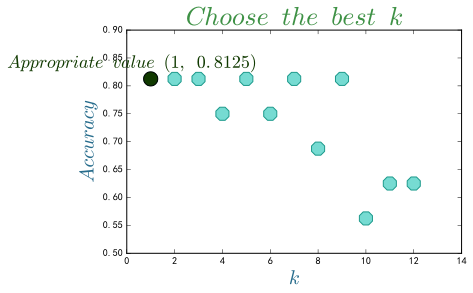

1 0.8125


In [62]:
range = np.arange(1, round(0.2 * train_X.shape[0]) + 1)
accuracies = []

for i in range:
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn_urine_clf = clf.fit(train_X, train_y)
    test_y_predicted = knn_urine_clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    accuracies.append(accuracy)
appr_k = accuracies.index(max(accuracies)) + 1

# 視覺化
plt.scatter(range, accuracies, c='#76DBD2', edgecolor='#1B998B', s=200, 
            marker='8', alpha=1)
plt.scatter(appr_k, max(accuracies), c='#103900', s = 200)
plt.xlabel('$k$',fontsize=20, color = "#276C8C")
plt.ylabel('$Accuracy$', fontsize=20, color = "#276C8C")
plt.title('$Choose$ $the$ $best$ $k$', fontsize = 26, color = "#3E9145")

plt.annotate("$Appropriate$ $value$ $(1 ,$ $0.8125)$", fontsize= 18, color = "#103900",xy=(appr_k, max(accuracies)),xytext=(appr_k-6,max(accuracies)+0.02))
plt.savefig(image_path + '\knn.png')
plt.savefig(image_path + '\knn.svg')
plt.show()

print(appr_k, max(accuracies))